In [152]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar datos
df = pd.read_csv('avocado_with_region_types.csv')

# Hacer copia del Dataframe original
df_copy=df

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_filtered = df_copy.loc[df_copy['region_type'] == 'GreaterRegion'].copy()

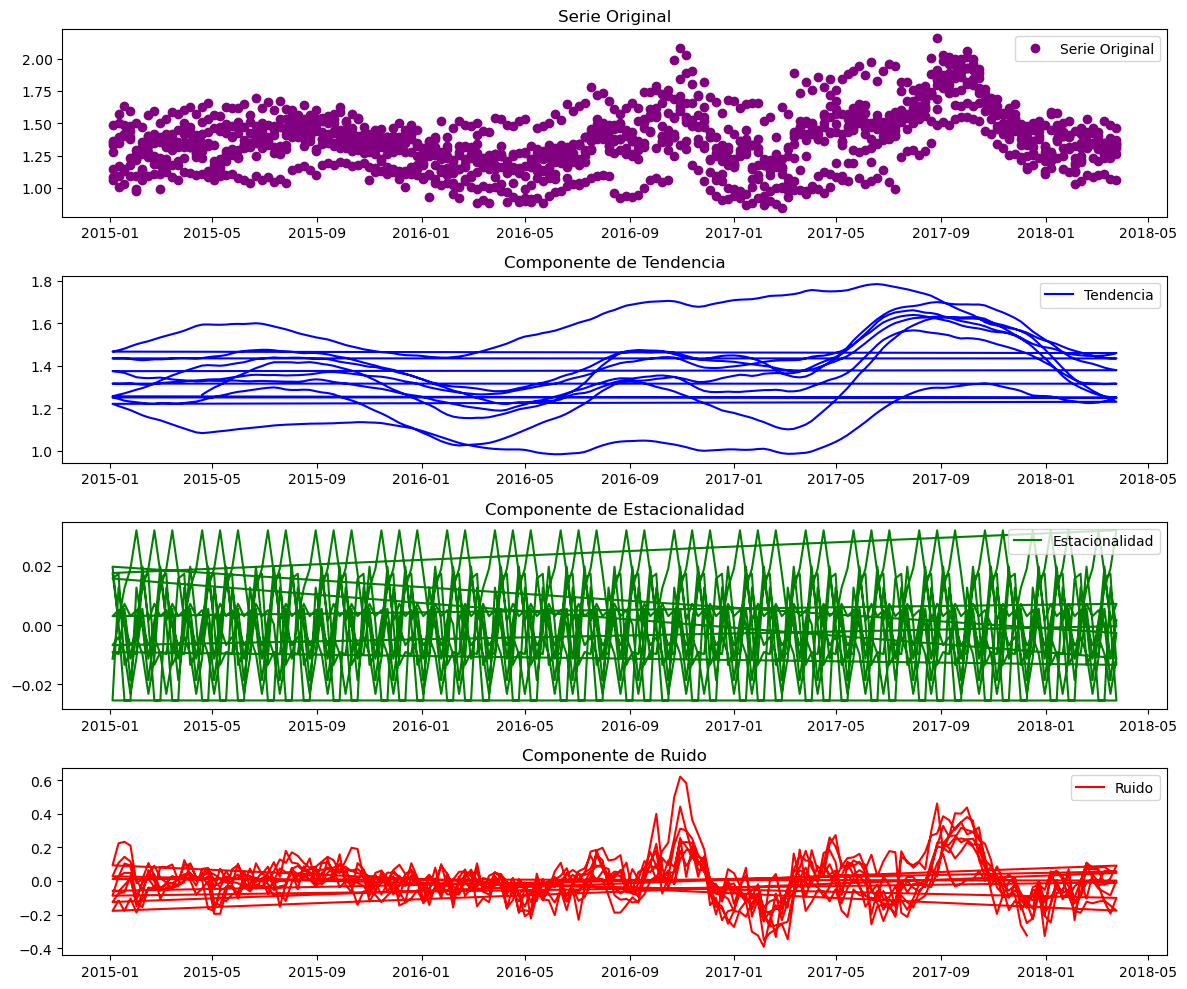

In [161]:
# Conversión de 'Date' a tipo datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date']) ̑

# Agrupar los datos por 'region' y 'Date', y calcular el promedio de 'AveragePrice'
df_grouped = df_filtered.groupby(['region', 'Date'], as_index=False)['AveragePrice'].mean()

# Establecer 'Date' como el índice
df_grouped.set_index('Date', inplace=True)

# Descomponer la serie temporal
result = seasonal_decompose(df_grouped['AveragePrice'], model='additive', period=30)  # Ajusta el periodo según la frecuencia de los datos

# Visualizar los componentes descompuestos
plt.figure(figsize=(12, 10))

# Serie original
plt.subplot(4, 1, 1)
plt.plot(df_grouped['AveragePrice'], marker='o', linestyle='', label='Serie Original', color='purple')
plt.title('Serie Original')
plt.legend()

# Componente de tendencia
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia', color='blue')
plt.title('Componente de Tendencia')
plt.legend()

# Componente estacional
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad', color='green')
plt.title('Componente de Estacionalidad')
plt.legend()

# Componente de residuo (ruido)
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Ruido', color='red')
plt.title('Componente de Ruido')
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()



In [155]:
# Definir función para categorizar fechas en estaciones
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autoum'


         region  AveragePrice
3     Northeast      1.601923
4        Plains      1.436509
2      Midsouth      1.404763
6     Southeast      1.398018
0    California      1.395325
1    GreatLakes      1.338550
7          West      1.272219
5  SouthCentral      1.101243


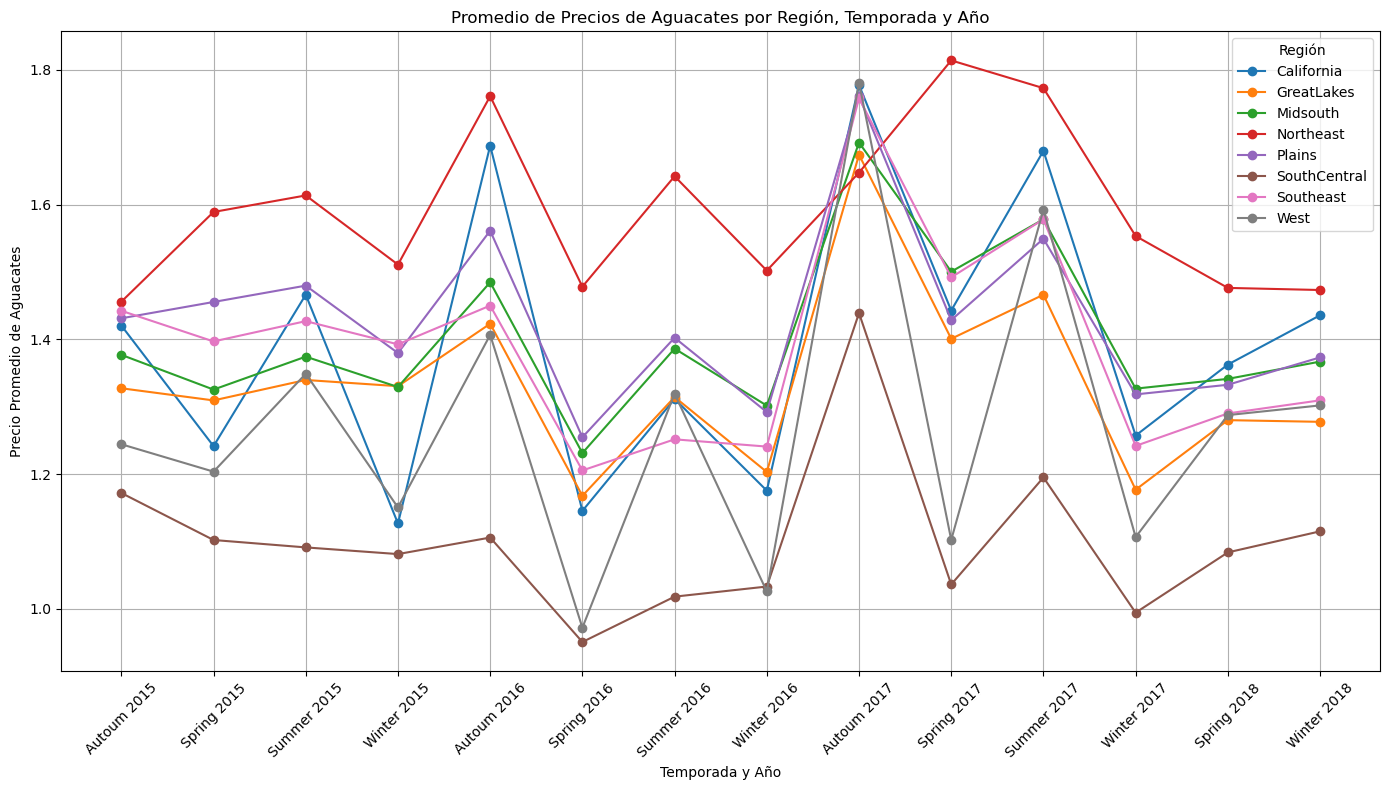

In [156]:
# Aplicar la función para crear una nueva columna 'Season'
df_filtered['Season'] = df_filtered['Date'].apply(get_season)

# Agrupar los datos por 'region' y 'Date', y calcular el promedio de 'AveragePrice'
df_grouped2 = df_filtered.groupby(['region','year','Season'], as_index=False)['AveragePrice'].mean()

# Calcular el promedio de 'AveragePrice' para cada región
average_price_per_region = df_filtered.groupby('region', as_index=False)['AveragePrice'].mean()

# Ordenar por 'AveragePrice' en orden descendente
average_price_per_region_sorted = average_price_per_region.sort_values(by='AveragePrice', ascending=False)

print(average_price_per_region_sorted)

# Graficar los puntos
plt.figure(figsize=(14, 8))

# Graficar cada región con un color diferente
for region, group in df_grouped2.groupby('region'):
    group['SeasonYear'] = group['Season'] + ' ' + group['year'].astype(str)
    plt.plot(group['SeasonYear'], group['AveragePrice'], label=region, marker='o')

# Configuración del gráfico
plt.title('Promedio de Precios de Aguacates por Región, Temporada y Año')
plt.xlabel('Temporada y Año')
plt.ylabel('Precio Promedio de Aguacates')
plt.xticks(rotation=45)  # Rotar las etiquetas
plt.legend(title='Región')
plt.grid()
plt.tight_layout()  # Ajustar el layout
plt.show()

/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_1516/4099950388.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average = df_filtered.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean().reset_index()


   month-year  AveragePrice
0     2015-01      1.313125
1     2015-02      1.274375
2     2015-03      1.318500
3     2015-04      1.353125
4     2015-05      1.317000
5     2015-06      1.368906
6     2015-07      1.379219
7     2015-08      1.422000
8     2015-09      1.421875
9     2015-10      1.373594
10    2015-11      1.296375
11    2015-12      1.275313
12    2016-01      1.211625
13    2016-02      1.196406
14    2016-03      1.190625
15    2016-04      1.170313
16    2016-05      1.167875
17    2016-06      1.248125
18    2016-07      1.368000
19    2016-08      1.366406
20    2016-09      1.395469
21    2016-10      1.523375
22    2016-11      1.526250
23    2016-12      1.259531
24    2017-01      1.236500
25    2017-02      1.139375
26    2017-03      1.318125
27    2017-04      1.421000
28    2017-05      1.462344
29    2017-06      1.454687
30    2017-07      1.529250
31    2017-08      1.675781
32    2017-09      1.824531
33    2017-10      1.736625
34    2017-11      1

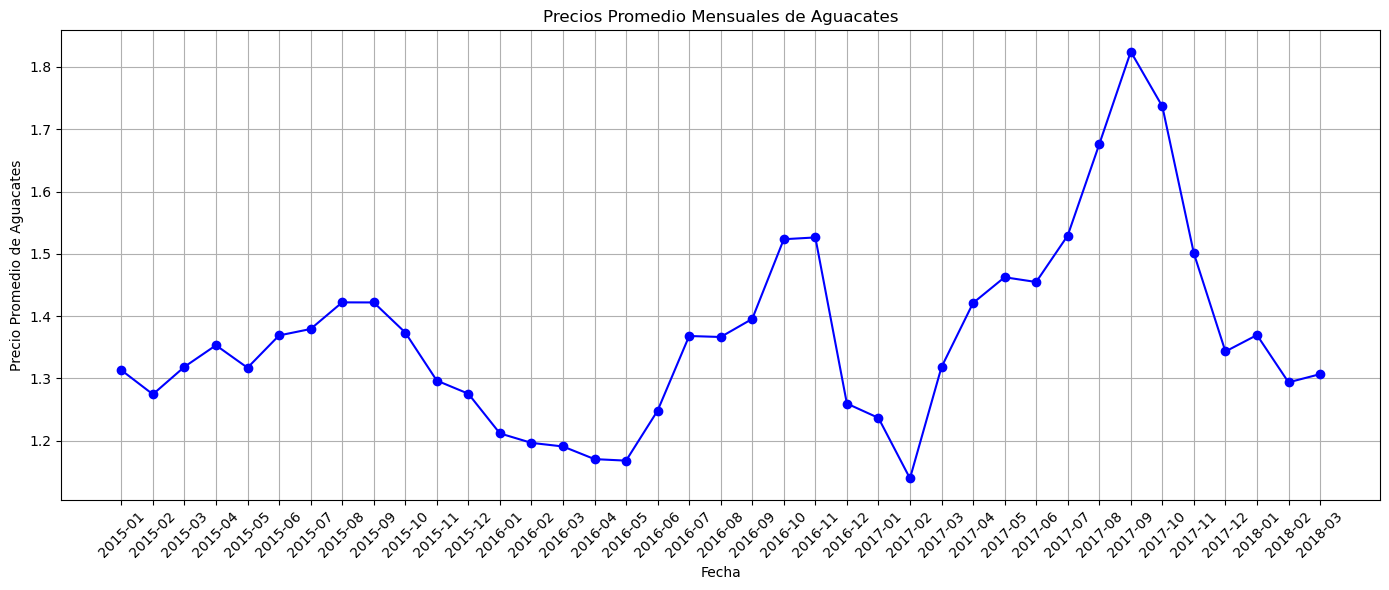

In [157]:
# Agrupar los datos por mes y calcular el promedio de 'AveragePrice'
monthly_average = df_filtered.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean().reset_index()

# Agregar una nueva columna llamada 'month-year' extrayendo el mes y año en formato 'YYYY-MM'
monthly_average['month-year'] = monthly_average['Date'].dt.to_period('M').astype(str)

# Mostrar el resultado
print(monthly_average[['month-year', 'AveragePrice']])

# Graficar los resultados
plt.figure(figsize=(14, 6))
plt.plot(monthly_average['month-year'], monthly_average['AveragePrice'], marker='o', linestyle='-', color='b')

# Configuración del gráfico
plt.title('Precios Promedio Mensuales de Aguacates')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio de Aguacates')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visibilidad
plt.grid()
plt.tight_layout()  # Ajustar el layout
plt.show()

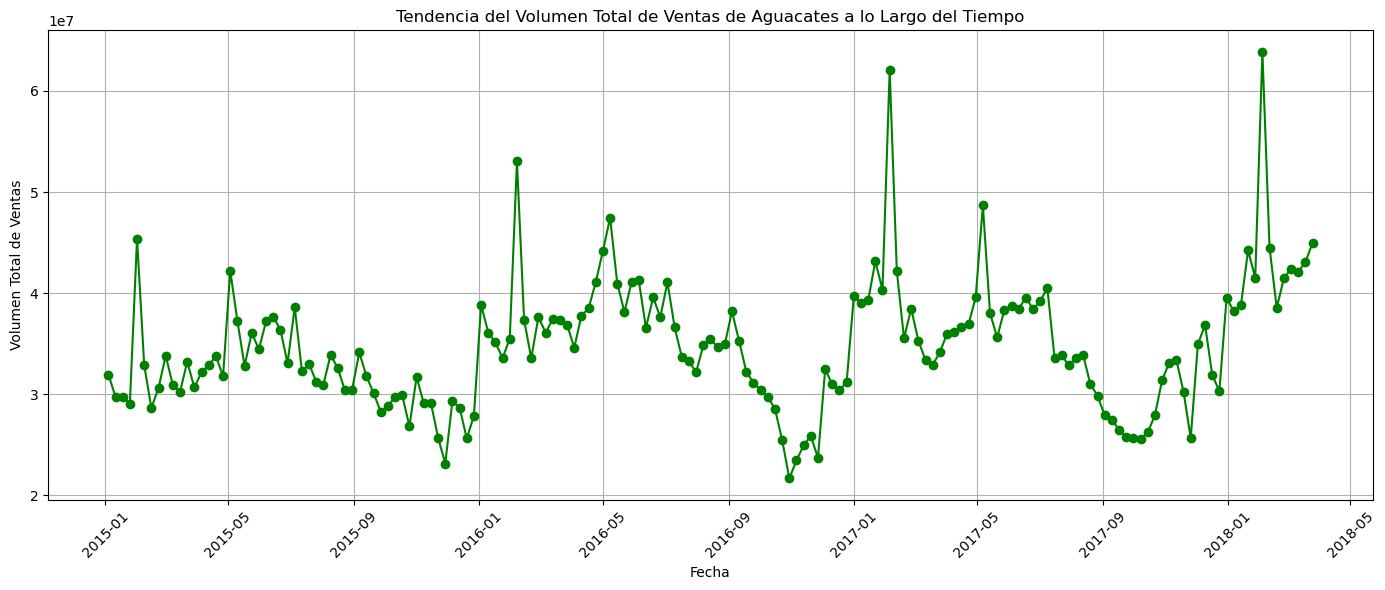

In [158]:
# Agrupar los datos por 'Date' y sumar el 'Total Volume'
sales_trend = df_filtered.groupby('Date', as_index=False)['Total Volume'].sum()

# Graficar los resultados
plt.figure(figsize=(14, 6))
plt.plot(sales_trend['Date'], sales_trend['Total Volume'], marker='o', linestyle='-', color='g')

# Configuración del gráfico
plt.title('Tendencia del Volumen Total de Ventas de Aguacates a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visibilidad
plt.grid()
plt.tight_layout()  # Ajustar el layout
plt.show()

/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_1516/1078139805.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_average_price = df_filtered.groupby(pd.Grouper(key='Date', freq='Y'))['AveragePrice'].mean().reset_index()


   year  AveragePrice
0  2015      1.342452
1  2016      1.303209
2  2017      1.468573
3  2018      1.323281


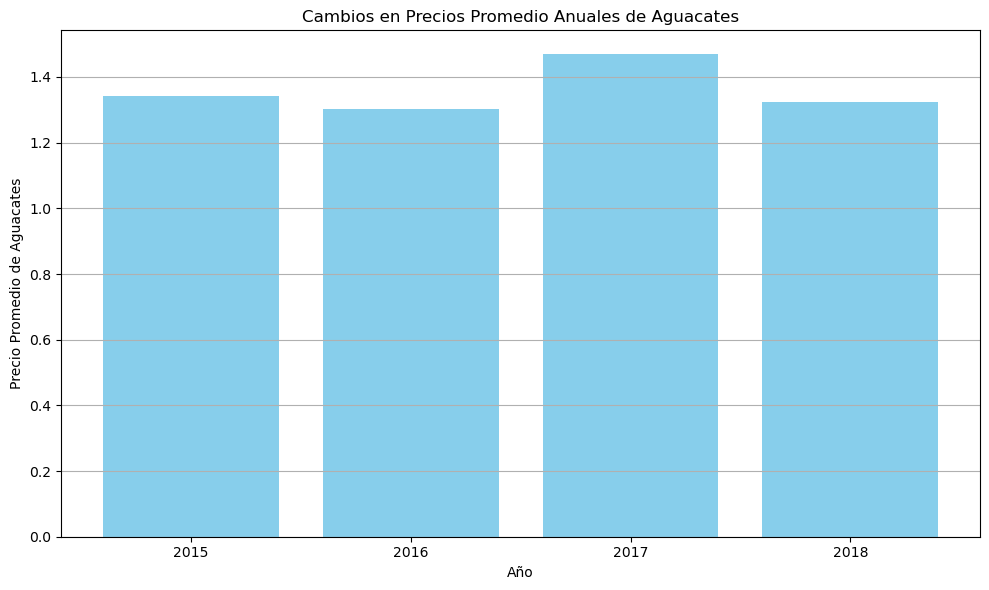

In [159]:
# Groupby Año
annual_average_price = df_filtered.groupby(pd.Grouper(key='Date', freq='Y'))['AveragePrice'].mean().reset_index()

# Agregar una columna 'year' para mostrar solo el año
annual_average_price['year'] = annual_average_price['Date'].dt.year

# Mostrar el resultado
print(annual_average_price[['year','AveragePrice']])

# Graficar los resultados en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(annual_average_price['year'], annual_average_price['AveragePrice'], color='skyblue')

# Configuración del gráfico
plt.title('Cambios en Precios Promedio Anuales de Aguacates')
plt.xlabel('Año')
plt.ylabel('Precio Promedio de Aguacates')
plt.xticks(annual_average_price['year'])  # Mostrar cada año en el eje x
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout
plt.show()